<p align="center">
    <img src="JHU.png" width="200" alt="Johns Hopkins University logo">
</p>

# Hands-on Lab: Implementing a Basic Convolutional Neural Network (ConvNet)

Estimated time needed: **60** minutes

## Overview:

In this lab, you will learn how to implement a basic Convolutional Neural Network (ConvNet) using a deep learning framework like TensorFlow or PyTorch. The ConvNet will be trained on the MNIST dataset, a collection of grayscale images of handwritten digits (0–9). You will construct a network with at least two convolutional layers, pooling layers, and fully connected layers to classify these digits.



## Objectives

By the end of this lab, you will:

- Understand the structure and functionality of convolutional and pooling layers.
- Construct a ConvNet using a deep learning framework.
- Train and evaluate the ConvNet on the MNIST dataset.
- Visualize performance metrics such as accuracy and loss.
- Extract insights about model performance.

## Dataset Description

- **Dataset**: MNIST
- **Features**: 28x28 grayscale images of handwritten digits.
- **Classes**: 10 (digits 0 through 9).
- **Size**: 60,000 training samples and 10,000 testing samples.
- **Source**: Preloaded in popular deep learning frameworks like TensorFlow and PyTorch.


## Assignment Tasks

### Step 1: Install and Import Necessary Libraries

> **Note**: Please ignore any warnings that appear during execution; they will not affect the correctness of your code or the upcoming tasks.

In [1]:
# Install necessary libraries (if not already installed)
!pip install tensorflow numpy matplotlib

# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip


### Task 2: Load the Dataset

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to include a channel dimension
# Write your code here!

# Reshape the data to include a channel dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(f"Training data shape: {x_train.shape}, Testing data shape: {x_test.shape}")


11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28, 1), Testing data shape: (10000, 28, 28, 1)


**Explanation**: 

- The MNIST dataset is loaded using Keras utilities.
- Images are normalized to have pixel values between 0 and 1.
- Reshaping adds a channel dimension to make the data compatible with the ConvNet input requirements.

<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python

# Reshape the data to include a channel dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(f"Training data shape: {x_train.shape}, Testing data shape: {x_test.shape}")
```
</details>

## Task 3: Visualize the Data

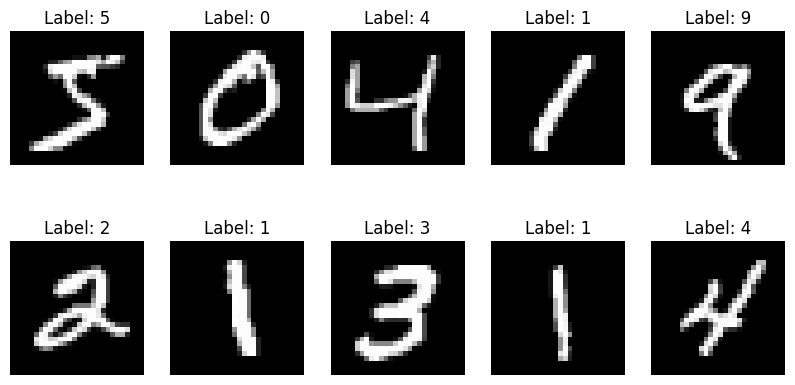

In [3]:
# Plot some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    
    # Write your code here!
    
    
plt.show()

**Explanation**:

- Visualize 10 random images from the dataset to understand the input data.

<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    

    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    
```
</details>

### Task 4: Define the Convolutional Neural Network

In [4]:
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer

    # Write your code here!
    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flattening the output and adding fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
    
    
    # Flattening the output and adding fully connected layers

    # Write your code here!
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

**Explanation**:

- Two convolutional layers are defined, each followed by a max-pooling layer.
- Fully connected layers are added at the end to produce class probabilities.
- `model.summary()` provides an overview of the network architecture.

<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flattening the output and adding fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
    
```
</details>

### Task 5: Compile and Train the Model

> **Note**:
The code compiles and trains the model for 5 epochs, using the Adam optimizer and sparse categorical cross-entropy loss. Depending on the dataset size and available hardware, this process may take some time to complete, so please be patient.

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 5 epochs with training data (x_train, y_train) 
# and validate on test data (x_test, y_test); may take time depending on dataset size.

# Write your code here!
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 8s 2ms/step - loss: 0.1266 - accuracy: 0.9628 - val_loss: 0.0399 - val_accuracy: 0.9866
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0422 - accuracy: 0.9870 - val_loss: 0.0315 - val_accuracy: 0.9894
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0354 - val_accuracy: 0.9881
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.0291 - val_accuracy: 0.9903
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0286 - val_accuracy: 0.9916


**Explanation**:

- The model is compiled with the Adam optimizer and categorical cross-entropy loss.
- Training is performed for 5 epochs, with validation on the test set.

<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# Train the model for 5 epochs with training data (x_train, y_train) 
# and validate on test data (x_test, y_test); may take time depending on dataset size.

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
    
```
</details>

### Task 6: Evaluate the Model

In [6]:
# Evaluate the model's performance on the test data (x_test, y_test) and 
# print the test accuracy. The 'verbose=2' provides detailed output during evaluation.
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")



313/313 - 0s - loss: 0.0286 - accuracy: 0.9916 - 398ms/epoch - 1ms/step

Test accuracy: 0.991599977016449


<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python

# Evaluate the model's performance on the test data (x_test, y_test) and 
# print the test accuracy. The 'verbose=2' provides detailed output during evaluation.
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")
    
```
</details>

**Explanation**:

The model is evaluated on the test set to measure its performance on unseen data.

### Task 7: Visualize Training Results

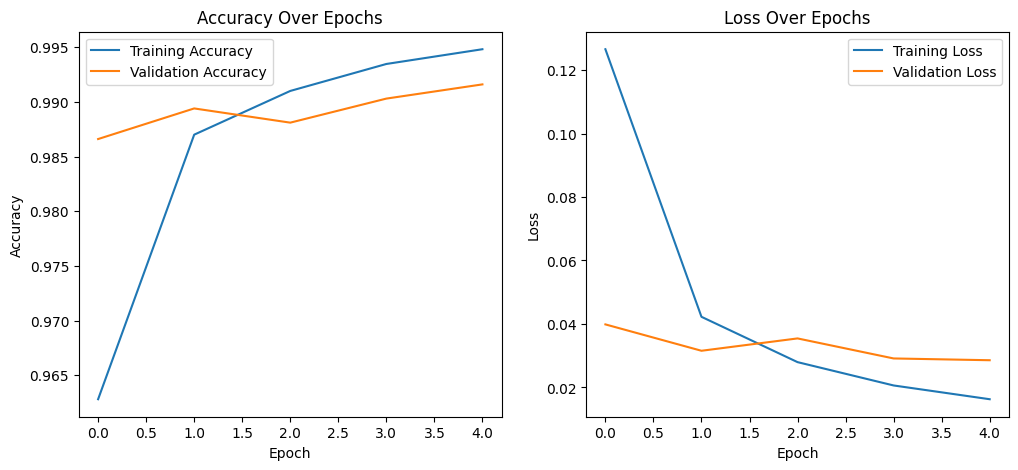

In [7]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()




<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
    
```
</details>

**Explanation**:

- Visualize the trends in training and validation accuracy and loss to understand the model’s learning progress.

### Explaination of outcome:

Achieving a **test accuracy more then 95%** on the MNIST dataset is excellent and entirely expected for a well-designed Convolutional Neural Network (ConvNet). Here's why:

### **Why This Accuracy is Reasonable**
1. **Dataset Characteristics**:  
   The MNIST dataset is relatively simple, with well-structured and clean grayscale images of digits. Many models achieve over 99% accuracy on this dataset.

2. **Model Design**:  
   Your network includes:
   - Two convolutional layers for feature extraction.
   - Pooling layers to reduce spatial dimensions.
   - Fully connected layers for final classification.  
   This architecture is powerful enough to classify MNIST images with high accuracy.

3. **Adam Optimizer**:  
   The Adam optimizer adapts learning rates during training, which helps achieve convergence faster and more effectively.

4. **Balanced Data**:  
   The dataset is balanced across all 10 classes (digits 0–9), making it less prone to bias during training.

---

### **What Next?**
If you're curious about improving or testing the robustness of your model:
- **Data Augmentation**: Apply transformations like rotations, scaling, or shifting to make the model more robust to variations.
- **Experiment with Hyperparameters**: Test different optimizers, learning rates, or architectures to explore their impact on performance.
- **Use a Complex Dataset**: Test your model on more challenging datasets like CIFAR-10 or Fashion-MNIST for broader insights.

Your results confirm that your implementation is correct, and the model is performing as expected for this dataset. Great work!

### Key Takeaways
- ConvNets are powerful for image classification tasks due to their ability to extract spatial features.
- Adding multiple convolutional and pooling layers improves feature extraction but increases computational cost.
- Training performance can be visualized using accuracy and loss curves.

### Summary:

In this lab, you implemented a basic ConvNet using TensorFlow. You trained the model on the MNIST dataset, achieving reasonable accuracy in classifying handwritten digits. You also learned to evaluate and visualize model performance, gaining insights into the network's learning dynamics.